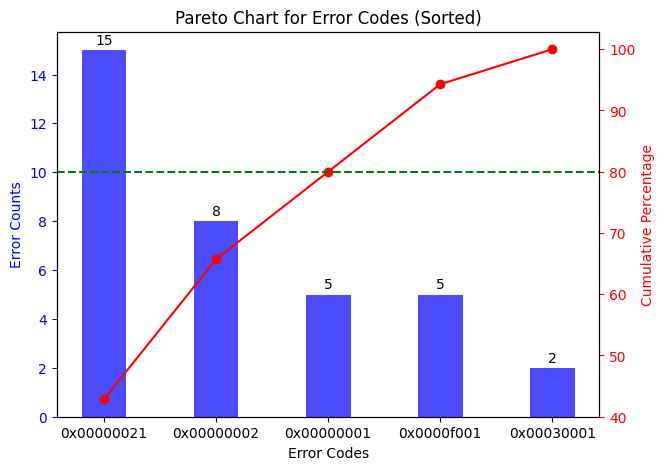

In [25]:
import matplotlib.pyplot as plt

err_list = [('0x00000001', 5), ('0x00000002', 8), ('0x00000021', 15), ('0x00030001', 2), ('0x0000f001', 5)]

# エラーコードと件数を分離
errors, counts = zip(*sorted(err_list, key=lambda x: x[1], reverse=True))

# 累積比率
cumulative_percentage = [sum(counts[:i+1])/sum(counts)*100 for i in range(len(counts))]

# 結果の描画
fig, ax1 = plt.subplots(figsize=(7, 5))
bars = ax1.bar(errors, counts, color='b', alpha=0.7, align='center', width=0.4)
ax1.set_xlabel('Error Codes')
ax1.set_ylabel('Error Counts', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(errors, cumulative_percentage, color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params('y', colors='r')
ax2.axhline(80, ls='--', color='g')

# 棒グラフに件数を表示
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.annotate('{}'.format(count),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 2),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.title('Pareto Chart for Error Codes (Sorted)')
plt.show()


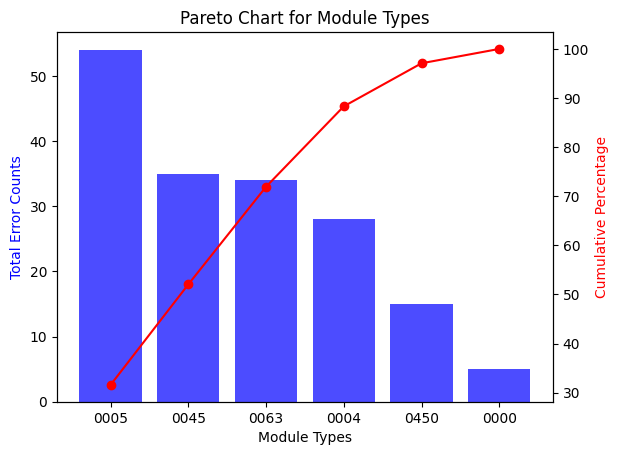

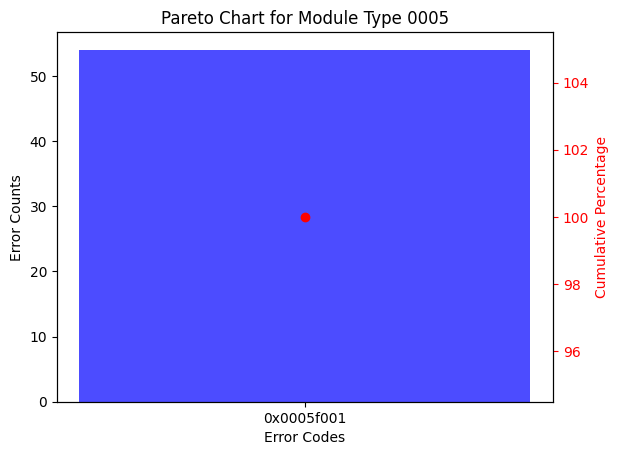

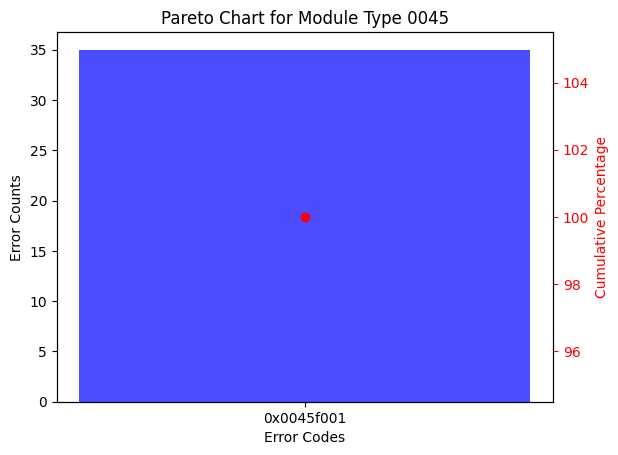

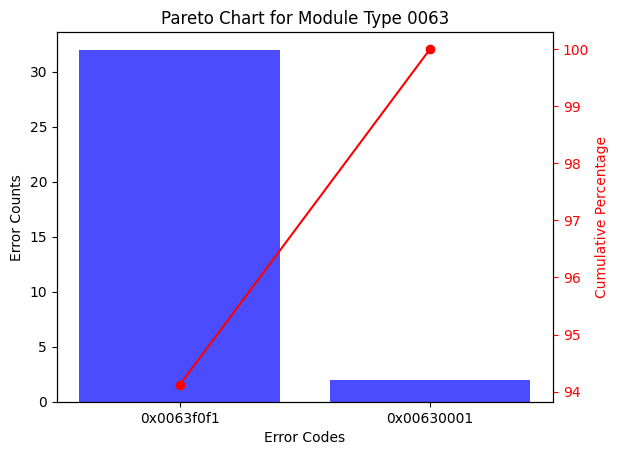

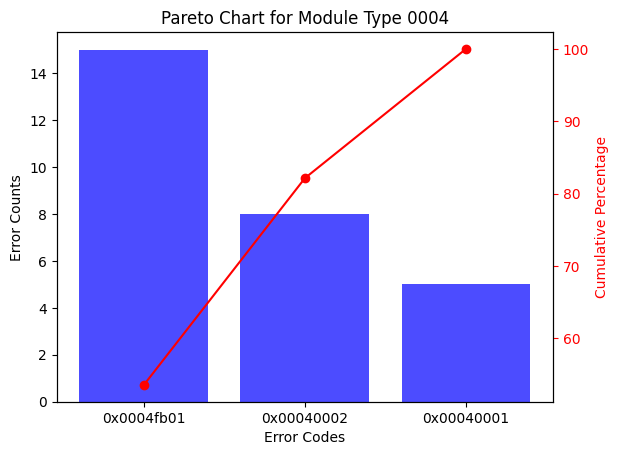

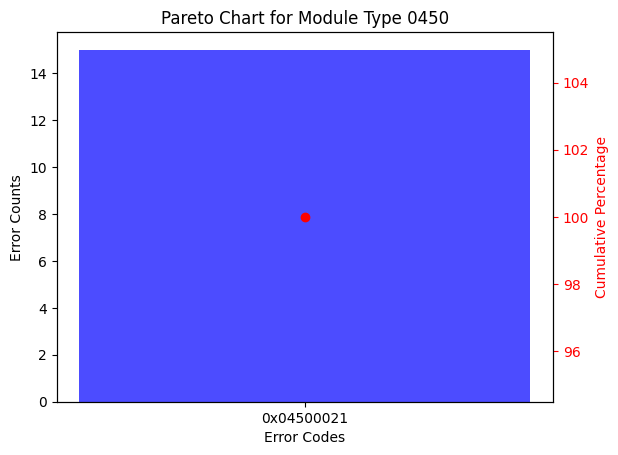

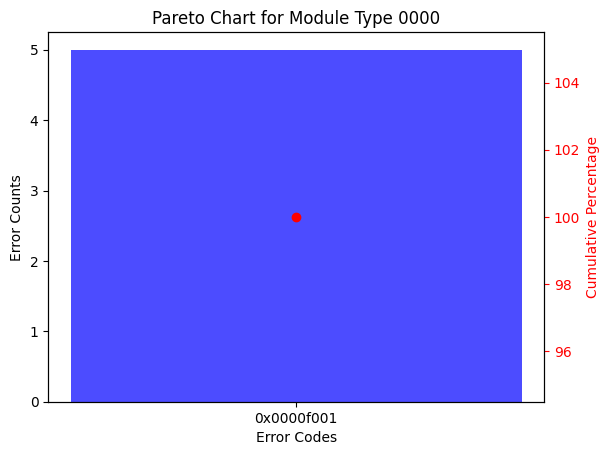

In [18]:
import matplotlib.pyplot as plt
from collections import defaultdict

err_list = [('0x00040001', 5), ('0x00040002', 8), ('0x04500021', 15), ('0x00630001', 2),
            ('0x0000f001', 5), ('0x0005f001', 54), ('0x0045f001', 35), ('0x0004fb01', 15),
            ('0x0063f0f1', 32)]

# モジュールのタイプごとにエラー件数を集計
module_type_counts = defaultdict(int)
for err_code, count in err_list:
    module_type = err_code[2:6]
    module_type_counts[module_type] += count

# 全体のパレート図を作成
fig, ax1 = plt.subplots()
module_types, total_counts = zip(*sorted(module_type_counts.items(), key=lambda x: x[1], reverse=True))

ax1.bar(module_types, total_counts, color='b', alpha=0.7, align='center')
ax1.set_xlabel('Module Types')
ax1.set_ylabel('Total Error Counts', color='b')
ax1.set_title('Pareto Chart for Module Types')

# 折れ線グラフを追加
ax2 = ax1.twinx()
cumulative_percentage = [sum(total_counts[:i+1])/sum(total_counts)*100 for i in range(len(total_counts))]
ax2.plot(module_types, cumulative_percentage, color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')

plt.show()

# 各モジュールのタイプごとにパレート図を作成
for module_type in module_types:
    module_errors = [(err_code, count) for err_code, count in err_list if err_code[2:6] == module_type]
    module_errors = sorted(module_errors, key=lambda x: x[1], reverse=True)

    fig, ax = plt.subplots()
    errors, counts = zip(*module_errors)
    cumulative_percentage = [sum(counts[:i+1])/sum(counts)*100 for i in range(len(counts))]

    bars = ax.bar(errors, counts, color='b', alpha=0.7, align='center')
    ax.set_xlabel('Error Codes')
    ax.set_ylabel('Error Counts')
    ax.set_title(f'Pareto Chart for Module Type {module_type}')
    ax2 = ax.twinx()
    ax2.plot(errors, cumulative_percentage, color='r', marker='o')
    ax2.set_ylabel('Cumulative Percentage', color='r')
    ax2.tick_params('y', colors='r')
    
    # 棒グラフに件数を表示
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax1.annotate('{}'.format(count),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    plt.show()